Alumno: Hineill David Céspedes Espinoza
Código:20213704

Pregunta 1 - Parte Computacional

En el presente ejercicio se explorar´a la de recuperaci´on de se˜nales utilizando
bancos de filtros pasa bajo y pasa alto. El enfoque se centrar´a en c´omo la convoluci
´on de se˜nales, junto con sistemas de interpolaci´on y decimaci´on, permite
la reconstrucci´on de se˜nales a partir de sus componentes filtrados. Para ilustrar
este proceso, se desarrollar´a un programa que realice lo siguiente:


a) (1 pto.) Generar una se˜nal X, monocomponente, cuya frecuencia var´ıa linealmente
desde 0,1 a 0,4 en frecuencia normalizada (donde 0.5 representa
la frecuencia de Nyquist). Su amplitud tambi´en var´ıa linealmente desde 0
a 1. Mostrar la se˜nal y su espectro en frecuencia normalizada. Comentar.

In [240]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp



Text(0, 0.5, 'Espectro de magnitud')

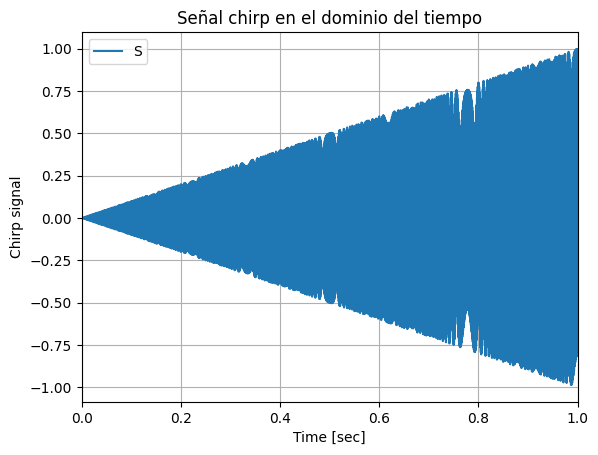

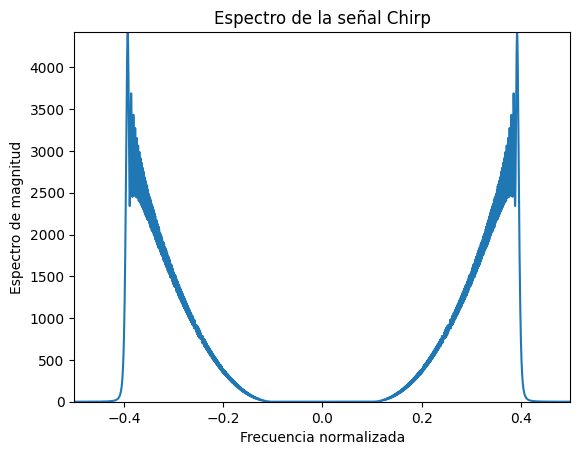

In [246]:
fs = 4e3 #Frecuencia de muestreo variable
f_ini = 0.1*fs #Frecuencia inicial
f_end = 0.4*fs #Frecuencia final
A_ini = 0 #Amplitud inicial 
A_end = 1 #Amplitud final
#Por el contexto del problema se puede entender que la frecuencia normalizada es respecto a la frecuencia de muestreo
# fNyquist = fs/2
# si fNyquist= 0.5 entonces fs = 1 
t = np.arange(A_ini,A_end,1/fs)
signal = t*chirp(t, f0=f_ini, f1=f_end, t1=1, method='linear')#Hacemos que la frecuencia esté cambiando de acuerdo a lo indicado 

#------------PLOTEAMOS LA SEÑAL EN EL TIEMPO
plt.figure(1)
plt.plot(t,signal)
plt.xlim([0,1])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Chirp signal') #Chirp es una señal usada en la que se varía la frecuencia a medida de que el tiempo avanza
plt.title('Señal chirp en el dominio del tiempo')
plt.legend('Señal chirp')
#---------------CALCULAMOS LA TRANSFORMADA DE FOURIER Y LA PLOTEAMOS NORMALIZADA
fft_signal = np.fft.fftshift(np.fft.fft(signal)) #Calculamos la tranformada de fourier
spc = np.abs(fft_signal)**2 #Obtenemos el cuadrado de la magnitud del espectro 
Ns= len(signal)
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)/(fs) #Graficamos normalizando
plt.figure(2)
plt.plot(freq, spc)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro de la señal Chirp")
plt.ylim([0,np.max(spc)])
plt.ylabel("Espectro de magnitud")

b) (1 pto.) Generar filtros h y g (ver programa lab1.py), los cuales son filtros
pasa bajo y pasa alto respectivamente. Graficar en frecuencia normalizada
(donde 0.5 representa la frecuencia de Nyquist) y comentar.

C:\Users\Hineill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\transforms.py:2860: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


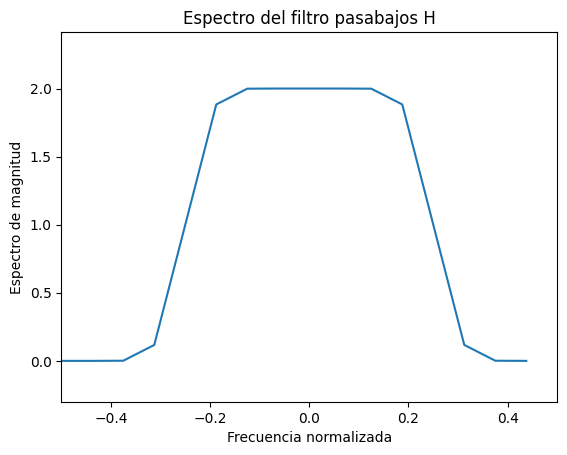

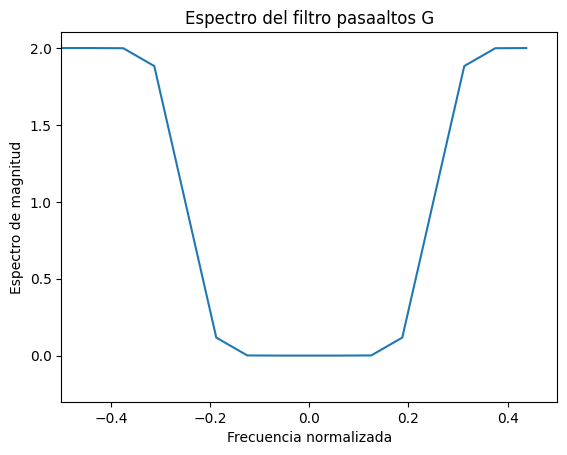

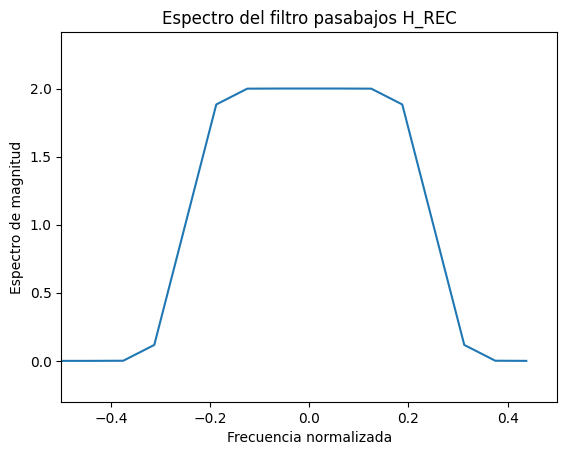

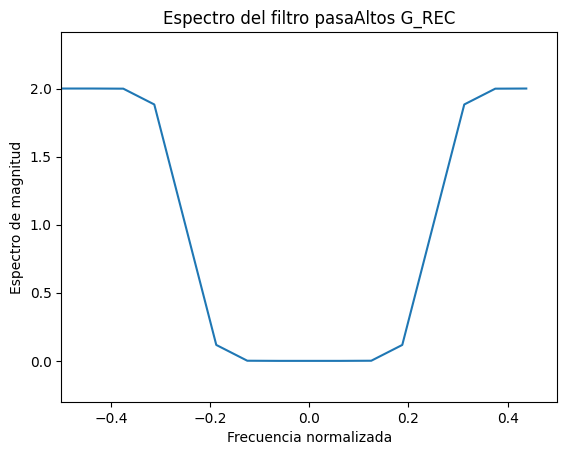

In [244]:
#Extraído de lab1.py 
h = np.array([-1.1748e-04,   6.7545e-04,  -3.9174e-04,  -4.8704e-03,   8.7461e-03,   1.3981e-02,  -4.4088e-02,
-1.7369e-02,   1.2875e-01,   4.7248e-04,  -2.8402e-01,  -1.5829e-02,   5.8535e-01,   6.7563e-01, 3.1287e-01,   5.4416e-02 ])

g = np.array([ -5.4416e-02,   3.1287e-01,  -6.7563e-01,   5.8535e-01,   1.5829e-02,  -2.8402e-01,  -4.7248e-04,
1.2875e-01,  1.7369e-02,  -4.4088e-02,   -1.3981e-02,   8.7461e-03,   4.8704e-03,  -3.9174e-04, -6.7545e-04,  -1.1748e-04 ])

h_rec = np.array([ 5.4416e-02,   3.1287e-01,   6.7563e-01,   5.8535e-01,  -1.5829e-02,  -2.8402e-01,   4.7248e-04,
1.2875e-01,  -1.7369e-02,  -4.4088e-02,   1.3981e-02,   8.7461e-03,  -4.8704e-03,  -3.9174e-04, 6.7545e-04,  -1.1748e-04 ])

g_rec = np.array([ -1.1748e-04,  -6.7545e-04,  -3.9174e-04,   4.8704e-03,   8.7461e-03,  -1.3981e-02,  -4.4088e-02,
1.7369e-02,   1.2875e-01,  -4.7248e-04,   -2.8402e-01,   1.5829e-02,   5.8535e-01,  -6.7563e-01, 3.1287e-01,  -5.4416e-02 ])

#Calculamos DFFT de cada uno
espectro_h = np.fft.fftshift(np.fft.fft(h)) 
espectro_g = np.fft.fftshift(np.fft.fft(g))
espectro_h_rec = np.fft.fftshift(np.fft.fft(h_rec))
espectro_g_rec = np.fft.fftshift(np.fft.fft(g_rec))
#freq = np.fft.fftfreq(h.shape[-1])
NumSamples= len(h)
freq = (np.arange(NumSamples) - NumSamples/2) * 1/ NumSamples #Asumimos frecuencia normalizada
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO H 
plt.figure(1)
plt.plot(freq, np.abs(espectro_h)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasabajos H")
plt.ylim([-0.3,np.max(espectro_h)+1])
plt.ylabel("Espectro de magnitud")
plt.show()
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO G
plt.figure(2)
plt.plot(freq, np.abs(espectro_g)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasaaltos G")
plt.ylim([-0.3,np.max(espectro_g)+1])
plt.ylabel("Espectro de magnitud")
plt.show()
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO H_REC 
plt.figure(3)
plt.plot(freq, np.abs(espectro_h_rec)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasabajos H_REC")
plt.ylim([-0.3,np.max(espectro_h_rec)+1])
plt.ylabel("Espectro de magnitud")
plt.show()
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO G_REC
plt.figure(4)
plt.plot(freq, np.abs(espectro_g_rec)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasaAltos G_REC")
plt.ylim([-0.3,np.max(espectro_g_rec)+1])
plt.ylabel("Espectro de magnitud")
plt.show()


c) (1 pto.) Convolucione la se˜nal de entrada con los filtros h y g: XL = X∗h,
XH = X∗g, mantener el n´umero de muestras de la se˜nal original. Grafique
el espectro de ambas se˜nales y comentar.

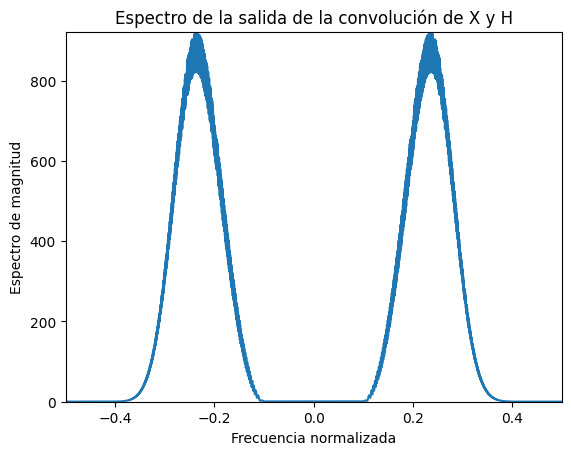

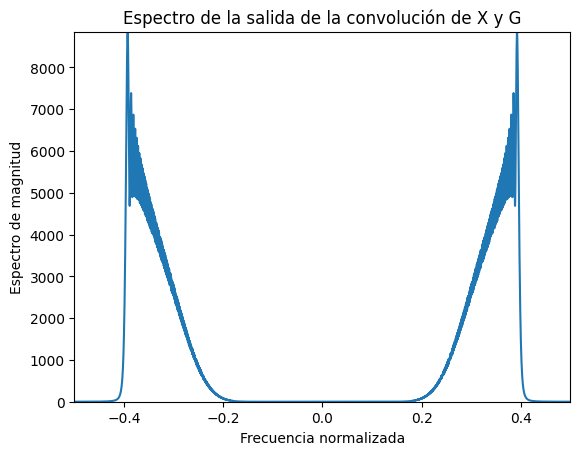

In [245]:
#Usamos funciones predeterminadas para realizar la convolución 
#---------------CASO LOW PASS FILTER
y_LPF = np.convolve(signal,h)#Calculamos la convolución
EspectroXLow = np.fft.fftshift(np.fft.fft(y_LPF))
NumSamplesConvolucion =  len(y_LPF)
freq = (np.arange(NumSamplesConvolucion) - NumSamplesConvolucion/2) * 1/ NumSamplesConvolucion #Frecuencia normalizada
#Espectro de la convolución con el LPF - Filtro H
plt.figure(1)
plt.plot(freq , np.abs(EspectroXLow)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro de la salida de la convolución de X y H")
plt.ylim([-0.3,np.max(np.abs(EspectroXLow)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.show()

#---------CASO HIGH PASS FILTER
y_HPF = np.convolve(signal,g)#Calculamos la convolución
EspectroXHigh = np.fft.fftshift(np.fft.fft(y_HPF))
NumSamplesConvolucion =  len(y_HPF)
freq = (np.arange(NumSamplesConvolucion) - NumSamplesConvolucion/2) * 1/ NumSamplesConvolucion #Frecuencia normalizada
#Espectro de la convolución con el LPF - Filtro H
plt.figure(2)
plt.plot(freq , np.abs(EspectroXHigh)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro de la salida de la convolución de X y G")
plt.ylim([-0.3,np.max(np.abs(EspectroXHigh)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.show() 


d) (1 pto.) Submuestree (downsampling) con factor 2 las se˜nales XL y XH.
(XLDN = downsampling(XL) y XHDN = downsampling(XH)). Grafique el
espectro de cada una de ellas y comentar.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


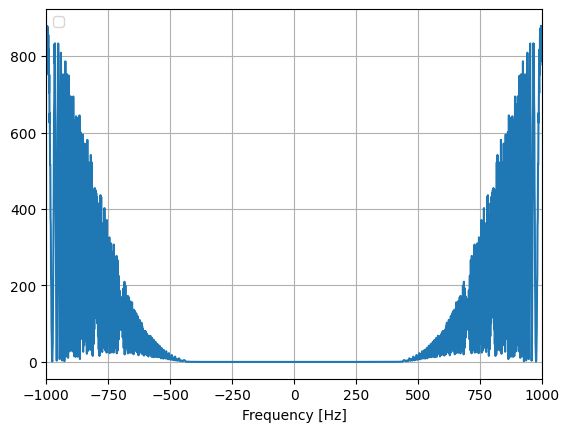

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


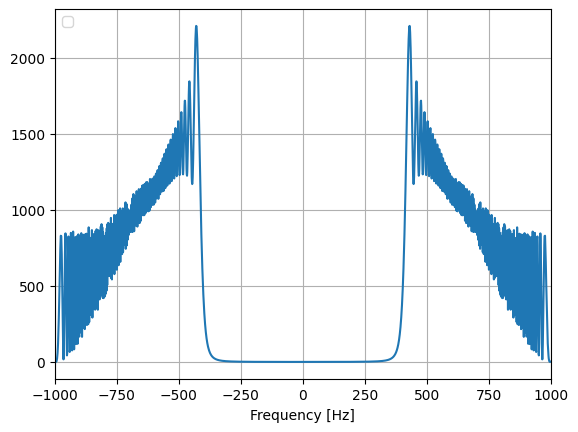

In [247]:
#--------Realizamos Downsampling ------------ con factor de 2
#EspectroXHigh 
#EspectroXLow
#y_HPF
#y_LPF

#DownSampling a XL , y_LPF

D = 2 #Factor
Ns =  len(y_LPF) 
Ns_dn = Ns/D
fs_dn = fs/D
n_dn = np.arange(Ns_dn)
XLDN = y_LPF[::D]
t_dn = n_dn/fs_dn

fft_XLDN = np.fft.fftshift(np.fft.fft(XLDN))
espectro_XLDN = np.abs(fft_XLDN)**2
freq_dn = (n_dn - Ns_dn/2) * fs_dn / Ns_dn

plt.figure(1)
plt.plot(freq_dn,espectro_XLDN)
plt.xlim([-fs_dn/2,fs_dn/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

#DownSampling a XH , y_HPF


D = 2 #Factor
Ns =  len(y_HPF) 
Ns_dn = Ns/D
fs_dn = fs/D
n_dn = np.arange(Ns_dn)
XHDN = y_HPF[::D]
t_dn = n_dn/fs_dn

fft_XHDN = np.fft.fftshift(np.fft.fft(XHDN))
espectro_XHDN = np.abs(fft_XHDN)**2
freq_dn = (n_dn - Ns_dn/2) * fs_dn / Ns_dn

plt.figure(1)
plt.plot(freq_dn,espectro_XHDN)
plt.xlim([-fs_dn/2,fs_dn/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()





e) (1 pto.) Realice un upsampling (factor 2) de las se˜nales que previamente
han pasado por el submuestreo. (YLUP = upsampling(XLDN) y YHUP =
upsampling(XHDN)). Grafique el espectro de cada una de ellas y comentar.

In [ ]:
#--------Realizamos Upsampling ------------ con factor de 2
#EspectroXHigh 
#EspectroXLow
#y_HPF
#y_LPF
#Upsampling a XL  , y_LPF
U = 2 #Factor
Ns = len(y_LPF)
y_LPF_up = U*Ns #
fs_up = U*fs
chirp_up = np.zeros([Ns_up])
chirp_up[U*n] = chirp[:]
t_up = np.arange(Ns_up)/fs_up



f) (1 pto.) Generar filtros hrec y grec (ver programa lab1.py). Convolucione
las se˜nales que previamente han pasado por la operaci´on de upsampling
con los filtros hrec y grec. YL = YLUP ∗ hrec, YH = YHUP ∗ grec, mantener el
n´umero de muestras de la se˜nal original. Grafique el espectro de cada una
de ellas y comentar.

g) (1 pto.) Compare la se˜nal Y = YL +YH y comp´arela con la se˜nal original.
Graficar en el tiempo y frecuencia, comentar sus resultados.

PREGUNTA 2:
Se busca realizar la decimación con factor 2 (reducir a la mitad la frecuencia
de muestreo) de una señal de audio. La señal se encuentra corrompida por tono
sinusuidal en una frecuencia mayor a la que señal de audio original se encuentra,
para ello se realizará lo siguiente:




a) (1 pto.) Leer el archivo audio.wav, identificar la frecuencia de muestreo y
en base a ello generar un vector de tiempos. Graficar la señal en el tiempo
y su espectro en frecuencia en Hz.

In [161]:
from scipy.io import wavfile

La frecuencia de muestreo usada en el audio es de :  3000 Hz


<StemContainer object of 3 artists>

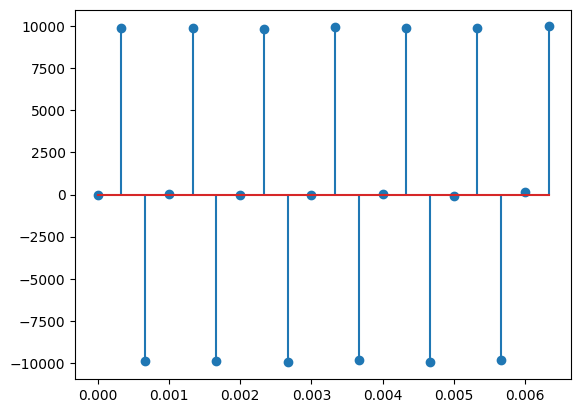

In [172]:
fs, y_t = wavfile.read('audio.wav') #Extraemos la frecuencia de muestreo (metadata) y los valores del arreglo
print(f"La frecuencia de muestreo usada en el audio es de :  { fs} Hz")
time_array = np.arange(len(y_t))/fs #Arreglo de tiempos
plt.figure(1)
plt.plot( time_array, y_t)
plt.title("Señal audio.wav en el dominio del tiempo ")
#plt.stem( time_array[:20], y_t[:20])

<StemContainer object of 3 artists>

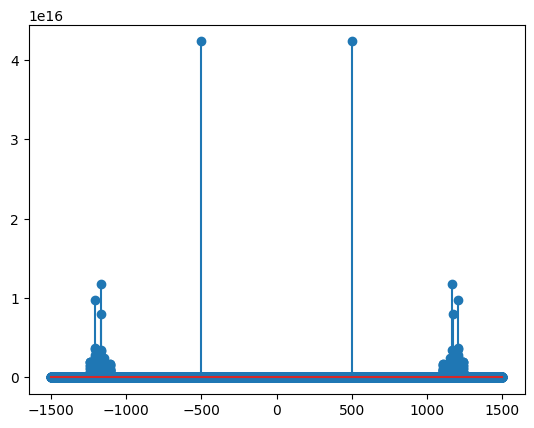

In [175]:
fft_wav = np.fft.fftshift(np.fft.fft(y_t)) #Calculamos la tranformada de fourier
spc = np.abs(fft_wav)**2 #Obtenemos el cuadrado de la magnitud del espectro 
freq = np.fft.fftfreq(time_array.shape[-1]) #Frecuencia normalizada
plt.figure(5)
plt.stem(freq*fs, spc)

b) (1 pto.) Hallar las frecuencias en las cuales se encuentra el audio original
y la frecuencia espec´ıfica del tono sinusoidal.

c) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando solo downsampling. Graficar el espectro en frecuencia
en Hz y guardar la se˜nal generada.


) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando solo downsampling. Graficar el espectro en frecuencia
en Hz y guardar la se˜nal generada.


d) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando decimaci´on, es decir aplicar un filtro pasa bajos ideal
y luego efectuar el downsampling. Graficar el espectro en frecuencia en Hz
y guardar la se˜nal generada.


e) (1 pto.) ¿C´omo se compararan ambos caso? ¿Cu´al m´etodo recupera adecuadamente
la se˜nal original y cual produce aliasing? Explicar el por qu´e
en ambos casos.
2

d) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando decimaci´on, es decir aplicar un filtro pasa bajos ideal
y luego efectuar el downsampling. Graficar el espectro en frecuencia en Hz
y guardar la se˜nal generada.
e) (1 pto.) ¿C´omo se compararan ambos caso? ¿Cu´al m´etodo recupera adecuadamente
la se˜nal original y cual produce aliasing? Explicar el por qu´e
en ambos casos.
2

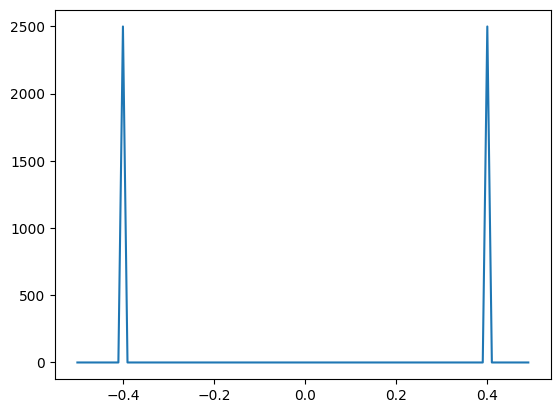

In [223]:
Fs = 1e3
t = np.arange(100)*1/Fs
F0 = 400
signal = np.sin(2*np.pi*F0*t)
espectro = np.fft.fftshift(np.fft.fft(signal))
Ns =  len(signal)
freq = (np.arange(Ns) - Ns/2) * 1/ Ns 
plt.plot(freq,np.abs(espectro)**2)

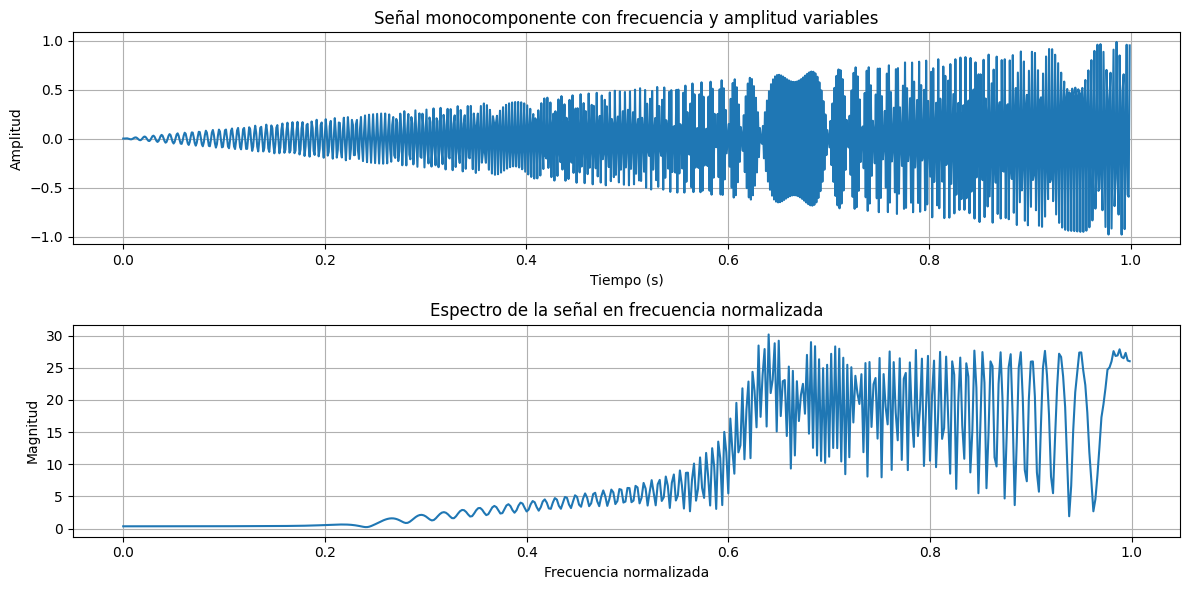

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1.0    # Duración de la señal (segundos)
N = int(T * fs)  # Número de puntos
t = np.linspace(0, T, N, endpoint=False)  # Vector de tiempo

# Frecuencia y amplitud linealmente variables
f0 = 0.1  # Frecuencia inicial (frecuencia normalizada)
f1 = 0.4  # Frecuencia final (frecuencia normalizada)
A = np.linspace(0, 1, N)  # Amplitud linealmente creciente

# Frecuencia de la señal, linealmente variable en frecuencia normalizada
f = f0 + (f1 - f0) * t / T  # Frecuencia en función del tiempo
X = A * np.sin(2 * np.pi * f * fs * t)  # Señal con frecuencia y amplitud variables

# Transformada de Fourier de la señal
X_fft = fft(X)
freqs = fftfreq(N, 1/fs)

# Gráficos
plt.figure(figsize=(12, 6))

# Gráfico de la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(t, X, label='Señal X(t)')
plt.title("Señal monocomponente con frecuencia y amplitud variables")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

# Gráfico del espectro de frecuencia (en frecuencia normalizada)
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2] / (fs/2), np.abs(X_fft[:N//2]), label='Espectro')
plt.title("Espectro de la señal en frecuencia normalizada")
plt.xlabel("Frecuencia normalizada")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()